In [1]:
import os

In [2]:
os.chdir('..')

In [3]:
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\tabular-playground-series-oct-2022.zip
.\data\final_submission.csv
.\data\sample_submission.csv
.\data\submission.csv
.\data\test.csv
.\data\test.feather
.\data\test_dtypes.csv
.\data\train_0.csv
.\data\train_0.feather
.\data\train_1.csv
.\data\train_1.feather
.\data\train_2.csv
.\data\train_2.feather
.\data\train_3.csv
.\data\train_3.feather
.\data\train_4.csv
.\data\train_4.feather
.\data\train_5.csv
.\data\train_5.feather
.\data\train_6.csv
.\data\train_6.feather
.\data\train_7.csv
.\data\train_7.feather
.\data\train_8.csv
.\data\train_8.feather
.\data\train_9.csv
.\data\train_9.feather
.\data\train_dtypes.csv
.\notebooks\Data - 80% Data - 0.19784.ipynb
.\notebooks\Data - All Data - 0.19747.ipynb
.\notebooks\Data - One Fold - 0.20257.ipynb
.\notebooks\Data to feather.ipynb
.\notebooks\.ipynb_checkpoints\Data - 80% Data - 0.19784-checkpoint.ipynb
.\notebooks\.ipynb_checkpoints\Data - All Data - 0.19747-checkpoint.ipynb
.\notebooks\.ipynb_checkpoints\Data - One Fold - 0.20257-checkp

In [4]:
import pandas as pd
import numpy as np

In [5]:
data_folder = "data/"
results_folder = "results/"
models_folder = "models/"

In [6]:
def reduce_mem_usage(df, verbose=True):
    start_mem = df.memory_usage().sum()/1024**2
    numerics = ['int8', 'int16', 'int32', 'int64',
                'float16', 'float32', 'float64']

    for col in df.columns:
        if col == 'team_scoring_next':
            df[col] = df[col].astype('category')
            continue
        col_type = df[col].dtypes
        limit = abs(df[col]).max()

        for tp in numerics:
            cond1 = str(col_type)[0] == tp[0]
            if tp[0] == 'i': cond2 = limit <= np.iinfo(tp).max
            else: cond2 = limit <= np.finfo(tp).max

            if cond1 and cond2:
                df[col] = df[col].astype(tp)
                break

    end_mem = df.memory_usage().sum()/1024**2

    reduction = (start_mem - end_mem)*100/start_mem
    if verbose:
        print(f'[INFO] Mem. usage decreased to {end_mem:.2f}'
              f' MB {reduction:.2f}% reduction.')
    return df

In [7]:
def feather_read_reduce(path):
    data = pd.read_feather(path)
    reduce_mem_usage(data)
    return data

In [8]:
for i in range(10):
    if i == 0:
        data = feather_read_reduce(f'{data_folder}train_{i}.feather')
    else:
        data_ = feather_read_reduce(f'{data_folder}train_{i}.feather')
        data = pd.concat([data,data_])
        del data_

[INFO] Mem. usage decreased to 245.98 MB 44.19% reduction.
[INFO] Mem. usage decreased to 248.20 MB 44.19% reduction.
[INFO] Mem. usage decreased to 243.24 MB 44.19% reduction.
[INFO] Mem. usage decreased to 242.00 MB 44.19% reduction.
[INFO] Mem. usage decreased to 242.37 MB 44.19% reduction.
[INFO] Mem. usage decreased to 239.61 MB 44.19% reduction.
[INFO] Mem. usage decreased to 236.20 MB 44.19% reduction.
[INFO] Mem. usage decreased to 241.43 MB 44.19% reduction.
[INFO] Mem. usage decreased to 246.26 MB 44.19% reduction.
[INFO] Mem. usage decreased to 240.65 MB 44.19% reduction.


In [9]:
data.columns

Index(['game_num', 'event_id', 'event_time', 'ball_pos_x', 'ball_pos_y',
       'ball_pos_z', 'ball_vel_x', 'ball_vel_y', 'ball_vel_z', 'p0_pos_x',
       'p0_pos_y', 'p0_pos_z', 'p0_vel_x', 'p0_vel_y', 'p0_vel_z', 'p0_boost',
       'p1_pos_x', 'p1_pos_y', 'p1_pos_z', 'p1_vel_x', 'p1_vel_y', 'p1_vel_z',
       'p1_boost', 'p2_pos_x', 'p2_pos_y', 'p2_pos_z', 'p2_vel_x', 'p2_vel_y',
       'p2_vel_z', 'p2_boost', 'p3_pos_x', 'p3_pos_y', 'p3_pos_z', 'p3_vel_x',
       'p3_vel_y', 'p3_vel_z', 'p3_boost', 'p4_pos_x', 'p4_pos_y', 'p4_pos_z',
       'p4_vel_x', 'p4_vel_y', 'p4_vel_z', 'p4_boost', 'p5_pos_x', 'p5_pos_y',
       'p5_pos_z', 'p5_vel_x', 'p5_vel_y', 'p5_vel_z', 'p5_boost',
       'boost0_timer', 'boost1_timer', 'boost2_timer', 'boost3_timer',
       'boost4_timer', 'boost5_timer', 'player_scoring_next',
       'team_scoring_next', 'team_A_scoring_within_10sec',
       'team_B_scoring_within_10sec'],
      dtype='object')

# Total Speed

In [10]:
data = data.assign(p0_vel = lambda df_ : 
            (
                np.square(df_['p0_vel_x']) +
                np.square(df_['p0_vel_y']) +
                np.square(df_['p0_vel_z'])
            )**(1/2),
            
            p1_vel = lambda df_ : 
            (
                np.square(df_["p1_vel_x"]) +
                np.square(df_["p1_vel_y"]) +
                np.square(df_["p1_vel_z"])
            )**(1/2),
            
            p2_vel = lambda df_ : 
            (
                np.square(df_["p2_vel_x"]) +
                np.square(df_["p2_vel_y"]) +
                np.square(df_["p2_vel_z"])
            )**(1/2),
            
            p3_vel = lambda df_ : 
            (
                np.square(df_["p3_vel_x"]) +
                np.square(df_["p3_vel_y"]) +
                np.square(df_["p3_vel_z"])
            )**(1/2),
            
            p4_vel = lambda df_ : 
            (
                np.square(df_["p4_vel_x"]) +
                np.square(df_["p4_vel_y"]) +
                np.square(df_["p4_vel_z"])
            )**(1/2),
            
            p5_vel = lambda df_ : 
            (
                np.square(df_["p5_vel_x"]) +
                np.square(df_["p5_vel_y"]) +
                np.square(df_["p5_vel_z"])
            )**(1/2),
                   
            ball_vel = lambda df_ : 
            (
                np.square(df_["ball_vel_x"]) +
                np.square(df_["ball_vel_y"]) +
                np.square(df_["ball_vel_z"])
            )**(1/2)
            
)

# Distance from the ball

In [11]:
data = data.assign(p0_dist_ball = lambda df_ : 
            (
                np.square(df_['ball_pos_x']-df_[f"p0_pos_x"]) +
                np.square(df_['ball_pos_y']-df_[f"p0_pos_y"]) +
                np.square(df_['ball_pos_z']-df_[f"p0_pos_z"])
            )**(1/2),
            
            p1_dist_ball = lambda df_ : 
            (
                np.square(df_['ball_pos_x']-df_[f"p1_pos_x"]) +
                np.square(df_['ball_pos_y']-df_[f"p1_pos_y"]) +
                np.square(df_['ball_pos_z']-df_[f"p1_pos_z"])
            )**(1/2),
            
            p2_dist_ball = lambda df_ : 
            (
                np.square(df_['ball_pos_x']-df_[f"p2_pos_x"]) +
                np.square(df_['ball_pos_y']-df_[f"p2_pos_y"]) +
                np.square(df_['ball_pos_z']-df_[f"p2_pos_z"])
            )**(1/2),
            
            p3_dist_ball = lambda df_ : 
            (
                np.square(df_['ball_pos_x']-df_[f"p3_pos_x"]) +
                np.square(df_['ball_pos_y']-df_[f"p3_pos_y"]) +
                np.square(df_['ball_pos_z']-df_[f"p3_pos_z"])
            )**(1/2),
            
            p4_dist_ball = lambda df_ : 
            (
                np.square(df_['ball_pos_x']-df_[f"p4_pos_x"]) +
                np.square(df_['ball_pos_y']-df_[f"p4_pos_y"]) +
                np.square(df_['ball_pos_z']-df_[f"p4_pos_z"])
            )**(1/2),
            
            p5_dist_ball = lambda df_ : 
            (
                np.square(df_['ball_pos_x']-df_[f"p5_pos_x"]) +
                np.square(df_['ball_pos_y']-df_[f"p5_pos_y"]) +                
                np.square(df_['ball_pos_z']-df_[f"p5_pos_z"])
            )**(1/2)
            
)

# Model A

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit 
import lightgbm as lgb

In [13]:
# splitter = GroupShuffleSplit(test_size=.2, n_splits=1, random_state = 42)
# split = splitter.split(data, groups=data['game_num'])
# train_inds, test_inds = next(split)

In [14]:
# train = data.iloc[train_inds]
# test = data.iloc[test_inds]

In [15]:
train_A = data.drop(columns=['game_num','event_id','event_time','player_scoring_next','team_scoring_next','team_B_scoring_within_10sec'])
# test_A = test.drop(columns=['game_num','event_id','event_time','player_scoring_next','team_scoring_next','team_B_scoring_within_10sec'])

In [16]:
X_train_A = train_A.drop('team_A_scoring_within_10sec',axis=1)
y_train_A = train_A.team_A_scoring_within_10sec

# X_test_A = test_A.drop('team_A_scoring_within_10sec',axis=1)
# y_test_A = test_A.team_A_scoring_within_10sec

In [17]:
# X_train, X_test, y_train, y_test = train_test_split(data_A.drop('team_A_scoring_within_10sec',axis=1),data_A.team_A_scoring_within_10sec, test_size=0.2, random_state=42)

In [18]:
lgb_train_A = lgb.Dataset(X_train_A,y_train_A)
# lgb_eval_A  = lgb.Dataset(X_test_A,y_test_A)

In [19]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric' : 'binary_logloss',
    'n_estimators':4200,
#     'num_leaves': 31,
    'learning_rate': 0.03,
     'feature_fraction': 0.8,
     'bagging_fraction': 0.8,
     'bagging_freq': 5,
#     cross-entropy
    'verbose': -1,
    'device': 'gpu'
}

In [20]:
gbm_a = lgb.train(params,
                lgb_train_A)

C:\Users\Usuario\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


In [21]:
# training's binary_logloss: 0.172375	valid_1's binary_logloss: 0.192983 Score: 0.19784

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

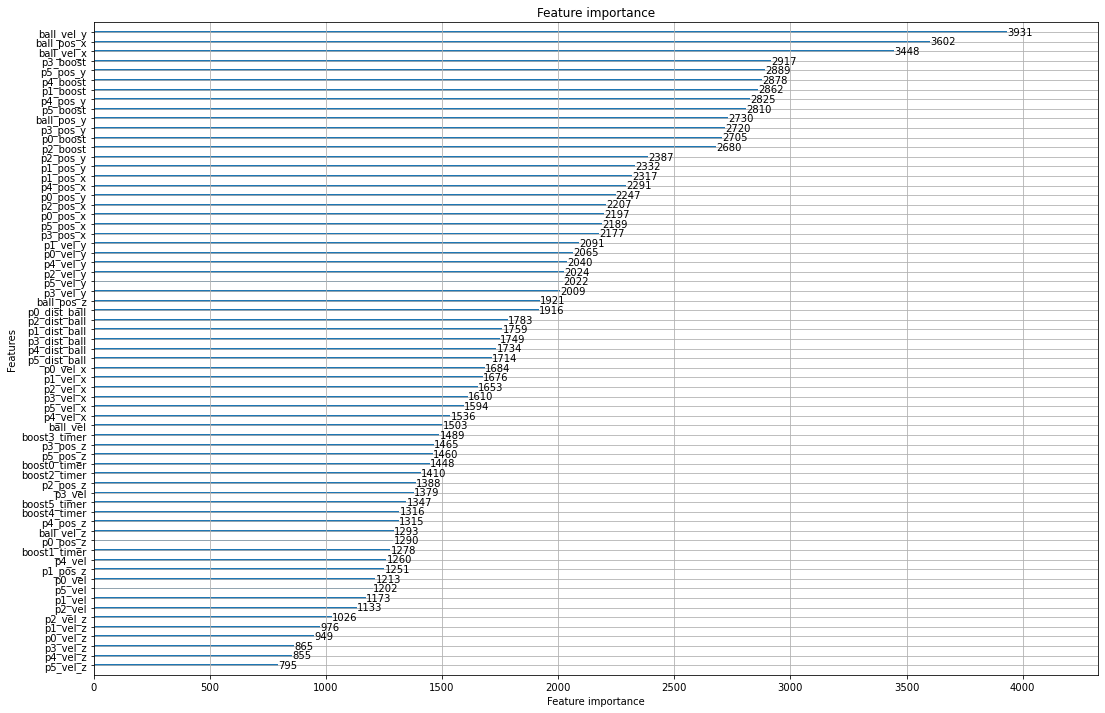

In [22]:
lgb.plot_importance(gbm_a,figsize=(18,12))

# Model B

In [23]:
train_B = data.drop(columns=['game_num','event_id','event_time','player_scoring_next','team_scoring_next','team_A_scoring_within_10sec'])
# test_B = test.drop(columns=['game_num','event_id','event_time','player_scoring_next','team_scoring_next','team_A_scoring_within_10sec'])

In [24]:
X_train_B = train_B.drop('team_B_scoring_within_10sec',axis=1)
y_train_B = train_B.team_B_scoring_within_10sec

# X_test_B = test_B.drop('team_B_scoring_within_10sec',axis=1)
# y_test_B = test_B.team_B_scoring_within_10sec

In [25]:
# X_train, X_test, y_train, y_test = train_test_split(data_B.drop('team_B_scoring_within_10sec',axis=1),data_B.team_B_scoring_within_10sec, test_size=0.2, random_state=42)

In [26]:
lgb_train_B = lgb.Dataset(X_train_B,y_train_B)
# lgb_eval_B  = lgb.Dataset(X_test_B,y_test_B)

In [27]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric' : 'binary_logloss',
    'n_estimators':3200,
#     'num_leaves': 31,
    'learning_rate': 0.03,
     'feature_fraction': 0.8,
     'bagging_fraction': 0.8,
     'bagging_freq': 5,
#     cross-entropy
    'verbose': -1,
    'device': 'gpu'
}

In [28]:
gbm_b = lgb.train(params,
                lgb_train_B)

C:\Users\Usuario\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


In [29]:
# [3063]	training's binary_logloss: 0.171561	valid_1's binary_logloss: 0.192704

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

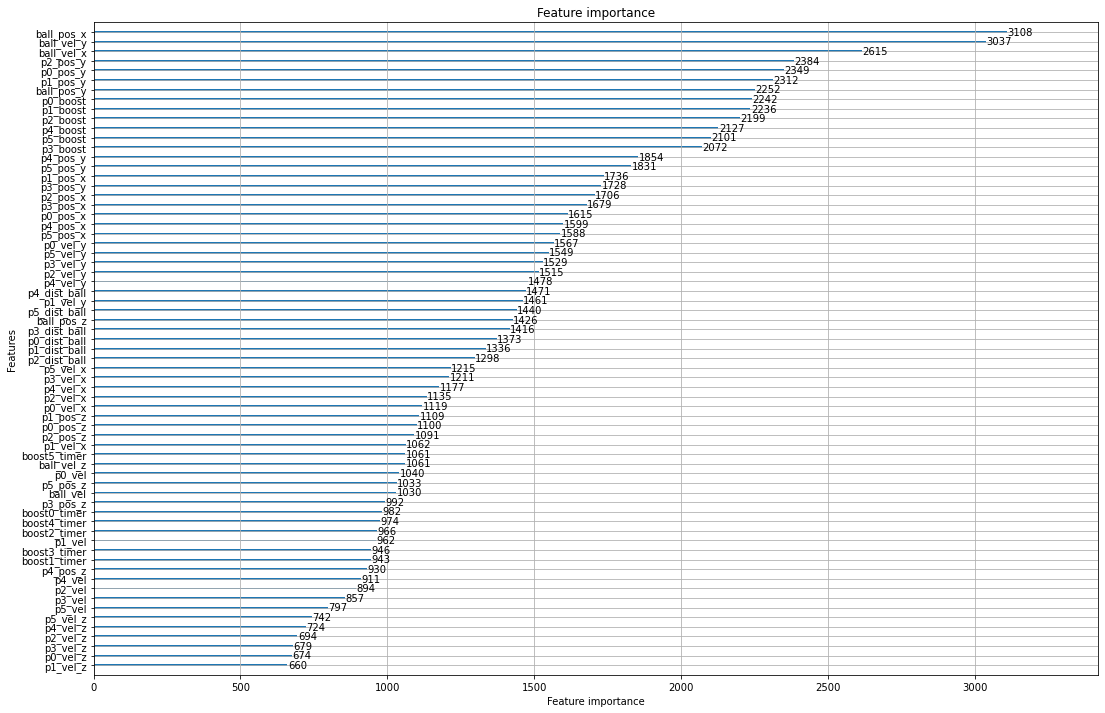

In [30]:
lgb.plot_importance(gbm_b,figsize=(18,12))

# Submission

In [31]:
test_sub = feather_read_reduce(f'{data_folder}test.feather').drop('id',axis=1)

[INFO] Mem. usage decreased to 74.89 MB 44.00% reduction.


In [32]:
test_sub = test_sub.assign(p0_dist_ball = lambda df_ : 
            (
                np.square(df_['ball_pos_x']-df_[f"p0_pos_x"]) +
                np.square(df_['ball_pos_y']-df_[f"p0_pos_y"]) +
                np.square(df_['ball_pos_z']-df_[f"p0_pos_z"])
            )**(1/2),
            
            p1_dist_ball = lambda df_ : 
            (
                np.square(df_['ball_pos_x']-df_[f"p1_pos_x"]) +
                np.square(df_['ball_pos_y']-df_[f"p1_pos_y"]) +
                np.square(df_['ball_pos_z']-df_[f"p1_pos_z"])
            )**(1/2),
            
            p2_dist_ball = lambda df_ : 
            (
                np.square(df_['ball_pos_x']-df_[f"p2_pos_x"]) +
                np.square(df_['ball_pos_y']-df_[f"p2_pos_y"]) +
                np.square(df_['ball_pos_z']-df_[f"p2_pos_z"])
            )**(1/2),
            
            p3_dist_ball = lambda df_ : 
            (
                np.square(df_['ball_pos_x']-df_[f"p3_pos_x"]) +
                np.square(df_['ball_pos_y']-df_[f"p3_pos_y"]) +
                np.square(df_['ball_pos_z']-df_[f"p3_pos_z"])
            )**(1/2),
            
            p4_dist_ball = lambda df_ : 
            (
                np.square(df_['ball_pos_x']-df_[f"p4_pos_x"]) +
                np.square(df_['ball_pos_y']-df_[f"p4_pos_y"]) +
                np.square(df_['ball_pos_z']-df_[f"p4_pos_z"])
            )**(1/2),
            
            p5_dist_ball = lambda df_ : 
            (
                np.square(df_['ball_pos_x']-df_[f"p5_pos_x"]) +
                np.square(df_['ball_pos_y']-df_[f"p5_pos_y"]) +                
                np.square(df_['ball_pos_z']-df_[f"p5_pos_z"])
            )**(1/2)
            
)

In [33]:
test_sub = test_sub.assign(p0_vel = lambda df_ : 
            (
                np.square(df_['p0_vel_x']) +
                np.square(df_['p0_vel_y']) +
                np.square(df_['p0_vel_z'])
            )**(1/2),
            
            p1_vel = lambda df_ : 
            (
                np.square(df_["p1_vel_x"]) +
                np.square(df_["p1_vel_y"]) +
                np.square(df_["p1_vel_z"])
            )**(1/2),
            
            p2_vel = lambda df_ : 
            (
                np.square(df_["p2_vel_x"]) +
                np.square(df_["p2_vel_y"]) +
                np.square(df_["p2_vel_z"])
            )**(1/2),
            
            p3_vel = lambda df_ : 
            (
                np.square(df_["p3_vel_x"]) +
                np.square(df_["p3_vel_y"]) +
                np.square(df_["p3_vel_z"])
            )**(1/2),
            
            p4_vel = lambda df_ : 
            (
                np.square(df_["p4_vel_x"]) +
                np.square(df_["p4_vel_y"]) +
                np.square(df_["p4_vel_z"])
            )**(1/2),
            
            p5_vel = lambda df_ : 
            (
                np.square(df_["p5_vel_x"]) +
                np.square(df_["p5_vel_y"]) +
                np.square(df_["p5_vel_z"])
            )**(1/2),
                   
            ball_vel = lambda df_ : 
            (
                np.square(df_["ball_vel_x"]) +
                np.square(df_["ball_vel_y"]) +
                np.square(df_["ball_vel_z"])
            )**(1/2)
            
)

In [34]:
predA = gbm_a.predict(test_sub)
predB = gbm_b.predict(test_sub)

In [35]:
# sub = pd.read_csv(f"{data_folder}sample_submission.csv")

# sub["team_A_scoring_within_10sec"] = predA
# sub["team_B_scoring_within_10sec"] = predB

# sub.to_csv(f"{data_folder}final_submission.csv",index=False)

In [52]:
df2 = pd.read_csv(f'{data_folder}submission.csv')
scores = [0.19747, 0.19198]
result_df = pd.DataFrame()
result_df["id"] = df2.id
result_df["team_A_scoring_within_10sec"] = predA * ((1 - scores[0]) / (len(scores) - sum(scores))) + df2.team_A_scoring_within_10sec * ((1 - scores[1]) / (len(scores) - sum(scores))) 
result_df["team_B_scoring_within_10sec"] = predB * ((1 - scores[0]) / (len(scores) - sum(scores))) + df2.team_B_scoring_within_10sec * ((1 - scores[1]) / (len(scores) - sum(scores))) 

In [58]:
result_df["team_A_scoring_within_10sec"] = (predA*0.2 + df2.team_A_scoring_within_10sec*0.8)
result_df["team_B_scoring_within_10sec"] = (predB*0.2 + df2.team_B_scoring_within_10sec*0.8)

In [59]:
result_df.head()

,id,team_A_scoring_within_10sec,team_B_scoring_within_10sec
0,0,0.033865,0.040654
1,1,0.009481,0.116508
2,2,0.020704,0.080116
3,3,0.037601,0.034153
4,4,0.016628,0.048892


In [60]:
result_df.to_csv(f"{data_folder}comb_final_submission.csv", index=False)